# Árbol de decisión con métodos de ensamble

## Los datos

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame()
make = [0,0.21,0.06,0,0,0,0,0,0.15,0.06,0,0,0,0,0,0,0,0,0,0,
        0,0.05,0,0,0,0.05,0,0,0,0,1.17,0,0,0,0,0,0,0,0,0,
        0.3,0,0,0,0,0.15,0.18,0.49,0.46,0.46,0,0,0,0,0,0,0,0,0,0,
        0,0.9,0,0.08,0,0,0,0,0,0,0,0,0.18,0,0,0,0,0,0,0,0,0,0,0,
        0.08,0,0,0,0,0,0,0,0,0.29,0.26,0,0,0,0,0]
address = [0.64,0.28,0,0,0,0,0,0,0,0.12,0,0,0.69,0,0,0.42,0,
           0,0,0.63,0,0.07,0,0,0,0.07,0,0,0,0,0,0,0,0,0.68,0,
           0,0,0.48,0.41,0,0,0,0,0,0.45,0,0,0.3,0.46,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.63,0,0.06,0,0,0,
           0,0,0,0,0,0,0,0,0.16,0,0,0,0,0,0,0,1.28,0,0,0,0,0,0,0]
capitalAve = [3.756,5.114,9.821,3.537,3.537,3,1.671,2.45,9.744,1.729,1.312,
              1.243,3.728,2.083,1.971,5.659,4.652,35.461,1.32,3.509,3.833,
              2.569,4.857,1.131,5.466,2.565,5.466,2.611,4,2.687,1.966,3.909,
              1.39,1.7,3.826,2.777,4.142,5.431,3.1,3.851,2.132,4,4,1.283,2.145,
              5.301,1.733,1.468,5.891,3.887,3.482,1.04,1,1.625,4.411,2.5,3.571,
              1,1.75,2.285,10.012,2.766,2,2.324,1.8,2.38,2,3.388,1.75,1.444,
              2.215,1.932,1.873,1,2.647,1.142,1.909,1,2.322,1.689,1.538,1.745,
              1.437,2.51,2.747,3.125,2.848,1.538,2.813,2,1,3.195,1.952,2.847,
              1.837,1.942,5.5,1.571,1,1]
capitalLong = [61,101,485,40,40,15,4,11,445,43,6,11,61,7,24,55,31,
               95,4,91,9,66,12,5,22,66,22,12,11,66,10,11,11,5,30,
               6,12,78,61,121,30,12,12,4,38,130,12,8,193,40,5,2,1,
               7,28,11,28,1,7,7,251,12,11,18,5,8,4,28,5,5,22,11,29,
               1,16,2,5,1,11,10,4,12,3,12,86,17,26,4,121,7,1,21,10,
               60,11,8,10,3,1,1]
tipo = ['spam','spam','spam','spam','spam','spam','spam','spam','spam','spam',
        'spam','spam','spam','spam','spam','spam','spam','spam','spam','spam',
        'spam','spam','spam','spam','spam','spam','spam','spam','spam','spam',
        'spam','spam','spam','spam','spam','spam','spam','spam','spam','spam',
        'spam','spam','spam','spam','spam','spam','spam','spam','spam','spam',
        'nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam',
        'nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam',
        'nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam',
        'nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam',
        'nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam','nonspam']

df['make'] = make
df['address'] = address
df['capitalAve'] = capitalAve
df['capitalLong'] = capitalLong
df['tipo'] = tipo

In [3]:
df.head(3)

,make,address,capitalAve,capitalLong,tipo
0,0.00,0.64,3.756,61,spam
1,0.21,0.28,5.114,101,spam
2,0.06,0.00,9.821,485,spam


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         100 non-null    float64
 1   address      100 non-null    float64
 2   capitalAve   100 non-null    float64
 3   capitalLong  100 non-null    int64  
 4   tipo         100 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [5]:
import numpy as np

In [6]:
df['tipo'] = np.where(df['tipo'] == 'spam', 1, 0)

In [7]:
print("Número de observaciones por clase")
print(df['tipo'].value_counts())

Número de observaciones por clase
0    50
1    50
Name: tipo, dtype: int64


In [8]:
print("Porcentaje de observaciones por clase")
print(100 * df['tipo'].value_counts(normalize=True))

Porcentaje de observaciones por clase
0    50.0
1    50.0
Name: tipo, dtype: float64


In [9]:
df.describe()

,make,address,capitalAve,capitalLong,tipo
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.055800,0.078300,3.188160,37.150000,0.500000
std,0.172663,0.210291,3.708639,73.553303,0.502519
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.721750,6.000000,0.000000
50%,0.000000,0.000000,2.415000,12.000000,0.500000
75%,0.000000,0.000000,3.735000,32.750000,1.000000
max,1.170000,1.280000,35.461000,485.000000,1.000000


Preparación de datos

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns = ['tipo'])
y = df['tipo']

Conjunto de entrenamiento y de prueba

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 42,
                                                    shuffle = True
                                                   )

##### Bagging, con reemplazamiento

Modelo

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [14]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42),
                            n_estimators = 500,
                            max_samples = 75,
                            bootstrap=True,
                            random_state = 42
                           )

In [15]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=75, n_estimators=500, random_state=42)

In [16]:
y_pred = bag_clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print(accuracy_score(y_test, y_pred))

0.85


##### Pasting, sin reemplazamiento

Modelo

In [19]:
pas_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42),
                            n_estimators = 500,
                            max_samples = 75,
                            bootstrap=False, 
                            random_state = 42
                           )

In [20]:
pas_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_samples=75, n_estimators=500,
                  random_state=42)

In [21]:
y_pred_pas = pas_clf.predict(X_test)

In [22]:
print(accuracy_score(y_test, y_pred_pas))

0.9


##### Random Forest

Modelo

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rnd_clf = RandomForestClassifier(n_estimators = 500,
                                 max_leaf_nodes = 4,
                                 random_state = 42,
                                 max_samples = 75
                                )

In [25]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=4, max_samples=75, n_estimators=500,
                       random_state=42)

In [26]:
y_pred_rf = rnd_clf.predict(X_test)

In [27]:
print(accuracy_score(y_test, y_pred_rf))

0.75


##### Árbol normal

In [28]:
tree_clf = DecisionTreeClassifier(random_state = 42, 
                                  max_depth = 3
                                 )

In [29]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [30]:
y_pred_tree = tree_clf.predict(X_test)

In [31]:
print(accuracy_score(y_test, y_pred_tree))

0.8


##### Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gb_clf = GradientBoostingClassifier(n_estimators = 500, 
                                    random_state = 42
                                   )

In [34]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=42)

In [35]:
y_pred_gb = gb_clf.predict(X_test)

In [36]:
print(accuracy_score(y_test, y_pred_gb))

0.85


##### Variación de hiperparámetros en ensamble

Se crean conjuntos de valores posibles para los hiperparámetros

In [37]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
max_depths = [1, 2, 3, 4]

Se inicializa el vector de resultados

In [38]:
resultados_test = []

Se crea una rutina para obtener los resultados

In [39]:
for eta in learning_rates:
    for d in max_depths:
        gb_clf_i = GradientBoostingClassifier(learning_rate = eta,
                                              n_estimators = 500,
                                              random_state = 42,
                                              max_depth = d)
        
        gb_clf_i.fit(X_train, y_train)
        
        y_pred_test = gb_clf_i.predict(X_test)
        
        acc_test = accuracy_score(y_test, y_pred_test)
        
        resultados_test.append(acc_test)

Representación de los resultados

In [40]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

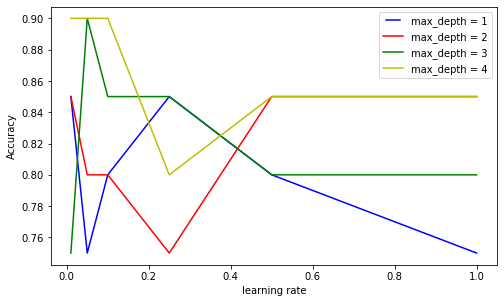

In [41]:
plt.figure(figsize=(8, 4.75))

line1, = plt.plot(learning_rates, resultados_test[0:6], "b",
label = "max_depth = 1")
line2, = plt.plot(learning_rates, resultados_test[6:12], "r",
label = "max_depth = 2")
line2, = plt.plot(learning_rates, resultados_test[12:18], "g",
label = "max_depth = 3")
line2, = plt.plot(learning_rates, resultados_test[18:24], "y",
label = "max_depth = 4")
plt.legend(handler_map={line1: HandlerLine2D(numpoints = 4)})
plt.ylabel("Accuracy")
plt.xlabel("learning rate")
plt.show()

##### Variables importantes

Primero con 1 nivel de profundidad y tasa de aprendizaje 0.01

In [42]:
gb_clf_i1 = GradientBoostingClassifier(learning_rate = 0.01,
                                       n_estimators = 500,
                                       random_state = 42,
                                       max_depth = 1
                                      )

In [43]:
gb_clf_i1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=500,
                           random_state=42)

In [44]:
importancias = gb_clf_i1.feature_importances_

In [45]:
indices = np.argsort(importancias)[::-1]

Ahora, con 4 niveles de produndidad y tasa de aprendizaje 0.1

In [46]:
gb_clf_i2 = GradientBoostingClassifier(learning_rate = 0.1,
                                       n_estimators = 500, 
                                       random_state = 42, 
                                       max_depth = 4
                                      )

In [47]:
gb_clf_i2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=500, random_state=42)

In [48]:
importancias2 = gb_clf_i2.feature_importances_

In [49]:
indices2 = np.argsort(importancias2)[::-1]

Representación gráfica

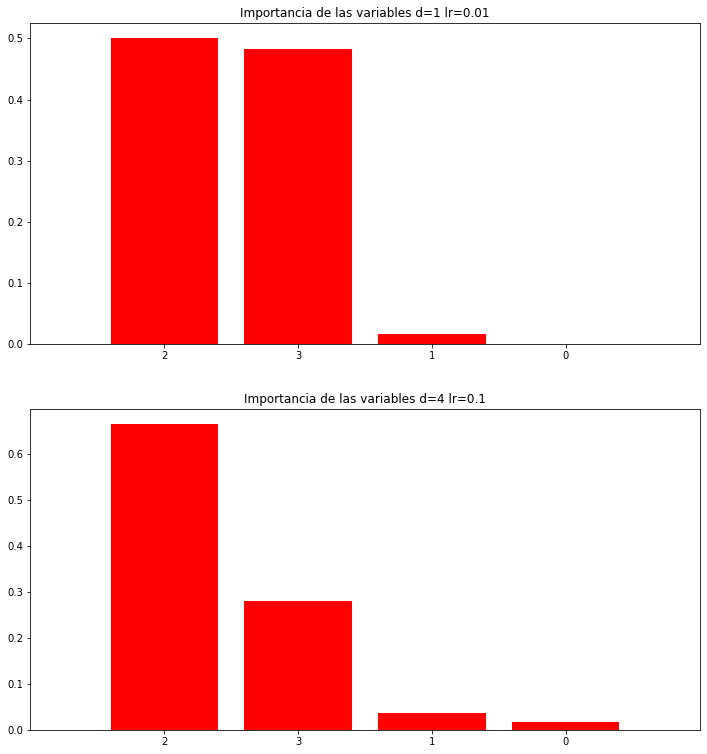

In [50]:
plt.figure(figsize = (12, 13))
plt.subplot(2, 1, 1)
plt.title("Importancia de las variables d=1 lr=0.01")
plt.bar(range(X.shape[1]), importancias[indices],
color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.subplot(2, 1, 2)
plt.title("Importancia de las variables d=4 lr=0.1")
plt.bar(range(X.shape[1]), importancias2[indices2],
color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Elaborado por Jairo Rojas